In [2]:
from datasets import load_from_disk

dataset = load_from_disk("D:/code/py/nlpsentiment/data/processed")
dataset


DatasetDict({
    train: Dataset({
        features: ['idx', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1821
    })
})

In [9]:
from datasets import load_dataset

ds = load_dataset("stanfordnlp/sst2")

In [10]:
# 查看每个 split 的基本信息
for split in dataset:
    print(f"=== {split.upper()} ===")
    print(dataset[split])
    print("Columns:", dataset[split].column_names)
    print("Example:", dataset[split][0])
    print()


=== TRAIN ===
Dataset({
    features: ['idx', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 67349
})
Columns: ['idx', 'text', 'label', 'input_ids', 'token_type_ids', 'attention_mask']
Example: {'idx': 0, 'text': 'hide new secretions from the parental units', 'label': 0, 'input_ids': [101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

=== Label Distribution: train ===
Label distribution: Counter({1: 37569, 0: 29780})


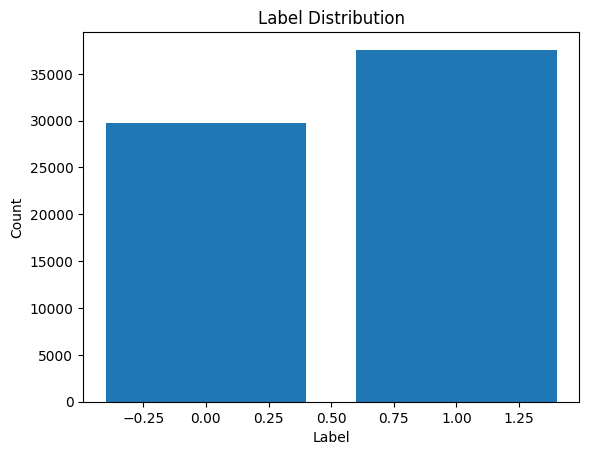

=== Label Distribution: validation ===
Label distribution: Counter({1: 444, 0: 428})


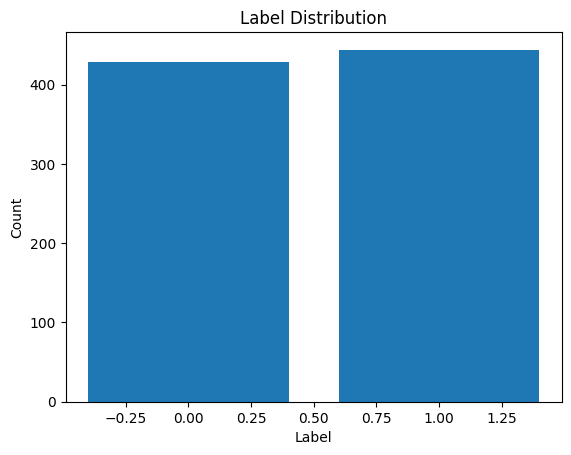

=== Label Distribution: test ===
Label distribution: Counter({-1: 1821})


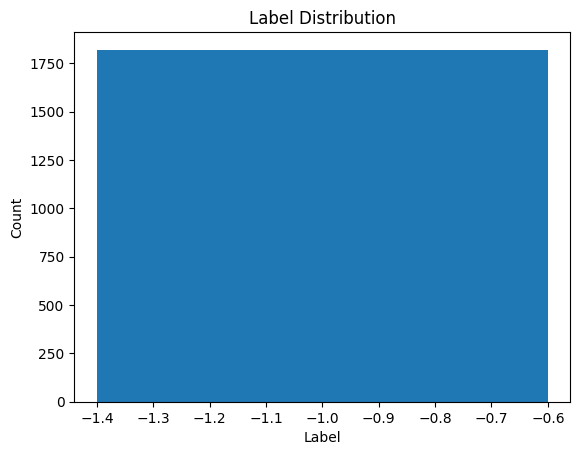

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

def show_label_distribution(ds, label_col="label"):
    labels = [x[label_col] for x in ds]
    counts = Counter(labels)

    print("Label distribution:", counts)

    plt.bar(counts.keys(), counts.values())
    plt.title("Label Distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()


for split in dataset:
    print(f"=== Label Distribution: {split} ===")
    show_label_distribution(dataset[split])


=== Text Length: train ===
Min length: 1
Max length: 52
Avg length: 9.41


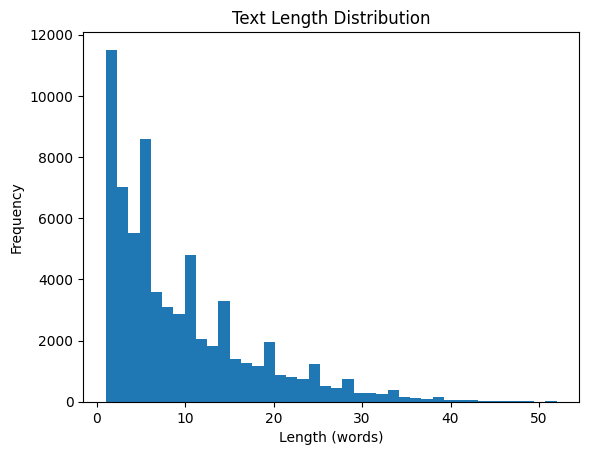

=== Text Length: validation ===
Min length: 2
Max length: 47
Avg length: 19.55


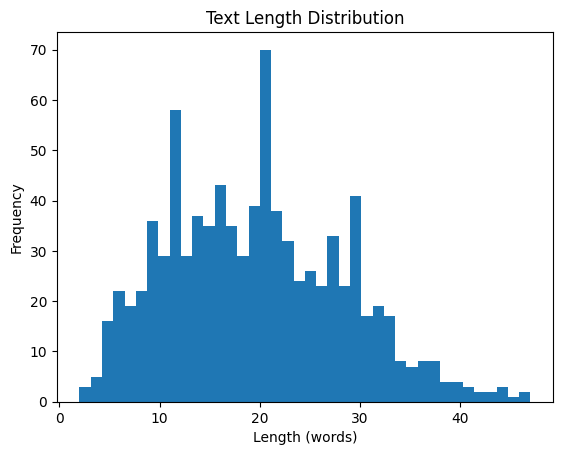

=== Text Length: test ===
Min length: 2
Max length: 56
Avg length: 19.23


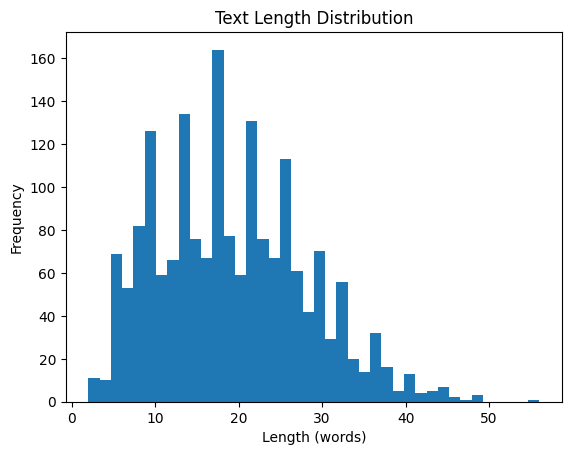

In [12]:
import matplotlib.pyplot as plt

def analyze_text_length(ds, text_col="text"):
    # 转成 pandas 方便操作
    import pandas as pd
    df = ds.to_pandas()
    
    lengths = df[text_col].apply(lambda x: len(str(x).split()))
    
    print(f"Min length: {lengths.min()}")
    print(f"Max length: {lengths.max()}")
    print(f"Avg length: {lengths.mean():.2f}")

    plt.hist(lengths, bins=40)
    plt.title("Text Length Distribution")
    plt.xlabel("Length (words)")
    plt.ylabel("Frequency")
    plt.show()

# 遍历各个 split
for split in dataset:
    print(f"=== Text Length: {split} ===")
    analyze_text_length(dataset[split])


In [13]:
def check_missing_text(ds, text_col="text"):
    import pandas as pd
    df = ds.to_pandas()
    
    missing = df[text_col].isna().sum()
    empty = df[text_col].apply(lambda x: isinstance(x, str) and x.strip() == "").sum()
    
    print("Missing text:", missing)
    print("Empty text:", empty)

# 遍历各个 split
for split in dataset:
    print(f"=== Missing/Empty Check: {split} ===")
    check_missing_text(dataset[split])



=== Missing/Empty Check: train ===
Missing text: 0
Empty text: 0
=== Missing/Empty Check: validation ===
Missing text: 0
Empty text: 0
=== Missing/Empty Check: test ===
Missing text: 0
Empty text: 0
